## Observations and Insights 

Conclusion 1:
There seems to be a strong correlation between the weight of the mouse and size of the tumor.  The more the mouse weighs the bigger the tumor size.  But - it is hard to determine if the size of the mouse affects the size of the tumor.
Conclusion 2:
Capomulin and Ramicane are the top 2 Drug Regimens for shrinking the tumor size.  The average sizes of the tumors that were treated with these 2 drug regimens were smaller than the other drugs.  They also had the largest number of timepoints studied which could mean the tumors were smaller because they were observed for a longer period of time.
Conclusion 3:
Based on mouse ID s185 Capomulin was shrinking the tumor over the course of the 45 days it was observed.  There was no increase in tumor size over the time period.  It is hard to say if that holds true for every mouse without charting the data for all mice using that drug regimen.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
#Run to make sure data loads
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#Run to make sure data loads
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#Combine both CSV files on the Mouse ID
mouse_data_combined_df = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])
mouse_data_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
num_mice = mouse_data_combined_df["Mouse ID"].nunique()
num_mice

249

In [6]:
#Find the mouse IDs with duplicated timepoints
find_duplicates = mouse_data_combined_df.loc[mouse_data_combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
find_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
#Remove the Mouse ID associated with the duplicated timepoints
mouse_data_combined_cleaned = mouse_data_combined_df.loc[mouse_data_combined_df["Mouse ID"] != ("g989")]
mouse_data_combined_cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
#Show number of Mouse IDs in cleaned data
mouse_data_combined_cleaned["Mouse ID"].nunique()


248

In [9]:
# Remove duplicate mouse IDs
mouse_data_combined_cleaned = mouse_data_combined_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep=False)
mouse_data_combined_cleaned.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [10]:
#Group to find mean
mouse_data_mean = mouse_data_combined_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
mouse_data_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.458254
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#Group to find median
mouse_data_median = mouse_data_combined_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
mouse_data_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#Group to find variance
mouse_data_variance = mouse_data_combined_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
mouse_data_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     44.053659
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#Group to find Standard Deviation
mouse_data_std = mouse_data_combined_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
mouse_data_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.637293
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [14]:
#Group to find SEM
mouse_data_stderror = mouse_data_combined_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
mouse_data_stderror

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.540135
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [15]:
#Create Summary Data Frame Table
mouse_data_summary_df = pd.DataFrame({"Tumor Volume Mean": mouse_data_mean,
                                      "Tumor Volume Median": mouse_data_median,
                                      "Tumor Volume Variance": mouse_data_variance,
                                      "Tumor Volume Standard Deviation": mouse_data_std,
                                      "Tumor Volume Standard Error": mouse_data_stderror})
mouse_data_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
#Create Summary Data Frame table with aggregate function
mouse_data_summary_df_agg = mouse_data_combined_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var','std', 'sem'])
mouse_data_summary_df_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [17]:
#Generate a bar chart using Pandas and Pyplot

In [18]:
#Group by timepoints for totals by Drug Regimen
total_timepoints = mouse_data_combined_cleaned.groupby(["Drug Regimen"], as_index=False)["Timepoint"].count()
total_timepoints


,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,151
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


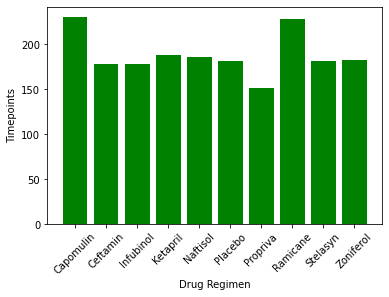

In [19]:
#Bar chart using Pyplot
x_axis = np.arange(len(total_timepoints))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, total_timepoints["Timepoint"], color='g')
plt.xticks(tick_locations, total_timepoints["Drug Regimen"], rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")


plt.show()

In [20]:
#Group by timepoints for totals by Drug Regimen
total_timepoints2 = mouse_data_combined_cleaned.groupby(["Drug Regimen"])["Timepoint"].count()
total_timepoints2

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     151
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

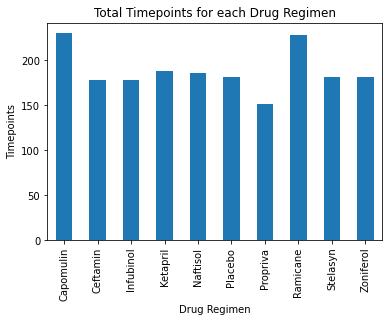

In [21]:
#Bar chart using Pandas
timepoints_chart = total_timepoints2.plot(kind='bar', title="Total Timepoints for each Drug Regimen")
timepoints_chart.set_xlabel("Drug Regimen")
timepoints_chart.set_ylabel("Timepoints")
plt.show()

In [22]:
#Generate and pie plot showing the distribution of female vs male mice using Pandas and Pyplot

In [23]:
#Group by Sex for total male and female mice
total_female_male = mouse_data_combined_cleaned.groupby(["Sex"], as_index=False)["Mouse ID"].nunique()
total_female_male

,Sex,Mouse ID
0,Female,124
1,Male,125


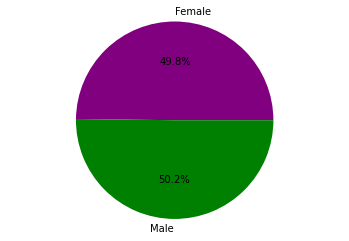

In [24]:
#Pie chart using Pyplot
labels = total_female_male["Sex"]
total_mice = total_female_male["Mouse ID"]
colors = ["purple", "green"]

plt.pie(total_mice, labels=labels, colors=colors, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

In [25]:
#Group by Sex for total male and female mice
total_female_male2 = mouse_data_combined_cleaned.groupby(["Sex"])["Mouse ID"].nunique()
total_female_male2



Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

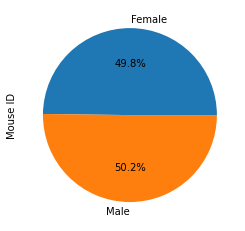

In [26]:
#Pie chart using Pyplot
total_female_male_chart = total_female_male2.plot(kind='pie', y= 'Sex', autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [28]:
#Find Max value of timepoint for each mouse ID
max_timepoint = mouse_data_combined_cleaned.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [29]:
#Create new dataframe for max timepoint for each mouse ID
max_timepoint_df = pd.DataFrame ({"Mouse ID": max_timepoint})
                                  
max_timepoint_df

,Mouse ID
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [30]:
#Merge original dataframe with new max timepoint dataframe
mouse_data_combined_stats_df = pd.merge(mouse_data_combined_cleaned, max_timepoint, how="inner", on=["Mouse ID", "Timepoint"])
mouse_data_combined_stats_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [31]:
#Filter for the 4 Regimens
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

merged_mouse_data_df = mouse_data_combined_stats_df.loc[mouse_data_combined_stats_df["Drug Regimen"].isin(treatments_list)] 
                
merged_mouse_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
235,x822,Ceftamin,Male,3,29,45,61.386660,3
237,y163,Infubinol,Female,17,27,45,67.685569,3
241,y769,Ceftamin,Female,6,27,45,68.594745,4
242,y865,Ceftamin,Male,23,26,45,64.729837,3


In [32]:
#Testing Regimen filter
test_treatment_list = merged_mouse_data_df["Drug Regimen"].value_counts()
test_treatment_list

Capomulin    25
Ramicane     25
Ceftamin     25
Infubinol    25
Name: Drug Regimen, dtype: int64

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [34]:
#I ran out of time to figure out how to get each box plot in one chart so I did them seperatly

In [35]:
#Create lists for each drug regimen
merged_mouse_data_c = merged_mouse_data_df.loc[merged_mouse_data_df["Drug Regimen"] == ("Capomulin")]
merged_mouse_data_r = merged_mouse_data_df.loc[merged_mouse_data_df["Drug Regimen"] == ("Ramicane")]
merged_mouse_data_i = merged_mouse_data_df.loc[merged_mouse_data_df["Drug Regimen"] == ("Infubinol")]
merged_mouse_data_ce = merged_mouse_data_df.loc[merged_mouse_data_df["Drug Regimen"] == ("Ceftamin")]



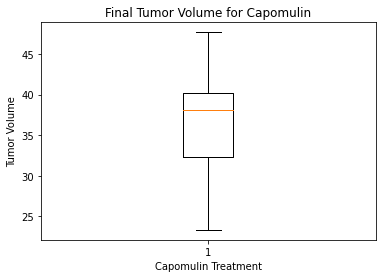

In [36]:
#Create box plot for Capomulin
tumor_volume_boxplot1 = merged_mouse_data_c["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume for Capomulin")
ax1.set_xlabel("Capomulin Treatment")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot(tumor_volume_boxplot1)

plt.show()

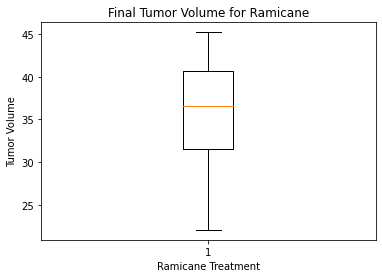

In [37]:
#Create boxplot for Ramicane
tumor_volume_boxplot2 = merged_mouse_data_r["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume for Ramicane")
ax1.set_xlabel("Ramicane Treatment")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot(tumor_volume_boxplot2)

plt.show()

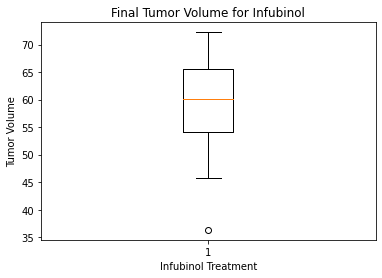

In [38]:
#Create boxplot for Infubinol
tumor_volume_boxplot3 = merged_mouse_data_i["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume for Infubinol")
ax1.set_xlabel("Infubinol Treatment")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot(tumor_volume_boxplot3)

plt.show()

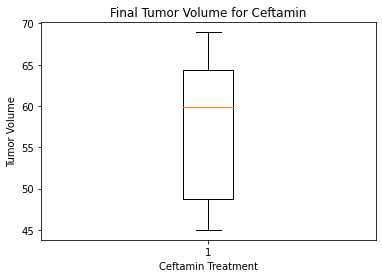

In [39]:
#Create boxplot for Ceftamin
tumor_volume_boxplot4 = merged_mouse_data_ce["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume for Ceftamin")
ax1.set_xlabel("Ceftamin Treatment")
ax1.set_ylabel("Tumor Volume")
ax1.boxplot(tumor_volume_boxplot4)

plt.show()

In [40]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [41]:
#Also seperated the IQR calculations

In [42]:
#IQR calculations for Capomulin
tumor_values = merged_mouse_data_c["Tumor Volume (mm3)"]
quartiles = tumor_values.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Tumor volume IQR calculation for Capomulin:")
print(f"The lower quartile of the tumor volumes is: {lowerq}")
print(f"The upper quartile of the tumor volumes is: {upperq}")
print(f"The interquartile range of the tumor volumes is: {iqr}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Tumor volume IQR calculation for Capomulin:
The lower quartile of the tumor volumes is: 32.37735684
The upper quartile of the tumor volumes is: 40.1592203
The interquartile range of the tumor volumes is: 7.781863460000004
The the median of tumor volumes is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [43]:
#IQR calculations for Infubinol
tumor_values = merged_mouse_data_i["Tumor Volume (mm3)"]
quartiles = tumor_values.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Tumor volume IQR calculation for Infubinol:")
print(f"The lower quartile of the tumor volumes is: {lowerq}")
print(f"The upper quartile of the tumor volumes is: {upperq}")
print(f"The interquartile range of the tumor volumes is: {iqr}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Tumor volume IQR calculation for Infubinol:
The lower quartile of the tumor volumes is: 54.04860769
The upper quartile of the tumor volumes is: 65.52574285
The interquartile range of the tumor volumes is: 11.477135160000003
The the median of tumor volumes is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [44]:
#IQR calculations for Ramicane
tumor_values = merged_mouse_data_r["Tumor Volume (mm3)"]
quartiles = tumor_values.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Tumor volume IQR calculation for Ramicane:")
print(f"The lower quartile of the tumor volumes is: {lowerq}")
print(f"The upper quartile of the tumor volumes is: {upperq}")
print(f"The interquartile range of the tumor volumes is: {iqr}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Tumor volume IQR calculation for Ramicane:
The lower quartile of the tumor volumes is: 31.56046955
The upper quartile of the tumor volumes is: 40.65900627
The interquartile range of the tumor volumes is: 9.098536719999998
The the median of tumor volumes is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [45]:
#IQR calculations for Ceftamin
tumor_values = merged_mouse_data_ce["Tumor Volume (mm3)"]
quartiles = tumor_values.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Tumor volume IQR calculation for Ceftamin:")
print(f"The lower quartile of the tumor volumes is: {lowerq}")
print(f"The upper quartile of the tumor volumes is: {upperq}")
print(f"The interquartile range of the tumor volumes is: {iqr}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Tumor volume IQR calculation for Ceftamin:
The lower quartile of the tumor volumes is: 48.72207785
The upper quartile of the tumor volumes is: 64.29983003
The interquartile range of the tumor volumes is: 15.577752179999997
The the median of tumor volumes is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


## Line and Scatter Plots

In [46]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [47]:
#Filter for Capomulin
treatment = mouse_data_combined_cleaned.loc[mouse_data_combined_cleaned["Drug Regimen"] == ("Capomulin")]
treatment.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [48]:
#Get all data for single mouse
single_mouse_ID = treatment.loc[treatment["Mouse ID"] == ("s185")]
single_mouse_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


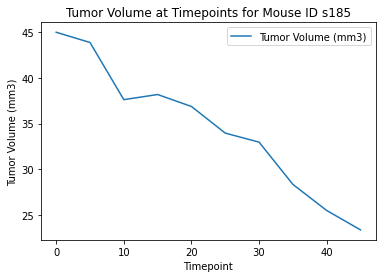

In [49]:
#Chart data for mouse ID s185
single_mouse_chart = single_mouse_ID.plot("Timepoint", "Tumor Volume (mm3)")

single_mouse_chart.set_xlabel("Timepoint")
single_mouse_chart.set_ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume at Timepoints for Mouse ID s185")
plt.show()

In [50]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [51]:
#Find average tumor size for each weight
tumor_volume_mean = treatment.groupby(["Drug Regimen", "Weight (g)"], as_index=False).mean()
tumor_volume_mean

,Drug Regimen,Weight (g),Age_months,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,15,16.000000,22.500000,36.182040,0.000000
1,Capomulin,17,14.769231,21.538462,37.214133,1.030769
2,Capomulin,19,7.666667,22.500000,41.182391,0.700000
3,Capomulin,20,23.000000,22.500000,39.141053,0.600000
4,Capomulin,21,17.458333,21.666667,42.088700,0.625000
5,Capomulin,22,15.500000,22.500000,43.288490,0.850000
6,Capomulin,23,6.478261,20.217391,43.341051,0.521739
7,Capomulin,24,1.000000,22.500000,44.805810,0.200000
8,Capomulin,25,14.857143,18.214286,44.062109,0.642857


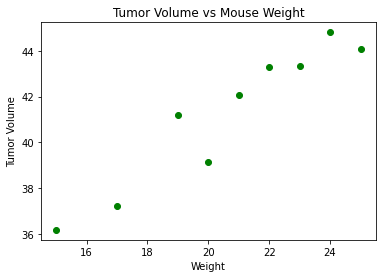

In [52]:
#Create Scatter plot for Tumor Volume vs Mouse Weight
x_values = tumor_volume_mean["Weight (g)"]
y_values = tumor_volume_mean["Tumor Volume (mm3)"]
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume vs Mouse Weight")
plt.scatter(x_values, y_values, marker = "o", facecolors="green", edgecolors="green")
plt.show()

## Correlation and Regression

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [54]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

0    36.185819
1    37.975364
2    39.764910
3    40.659682
4    41.554455
5    42.449227
6    43.344000
7    44.238773
8    45.133545
Name: Weight (g), dtype: float64


In [55]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.89x +22.76


The r-value is: 0.9034966277438606


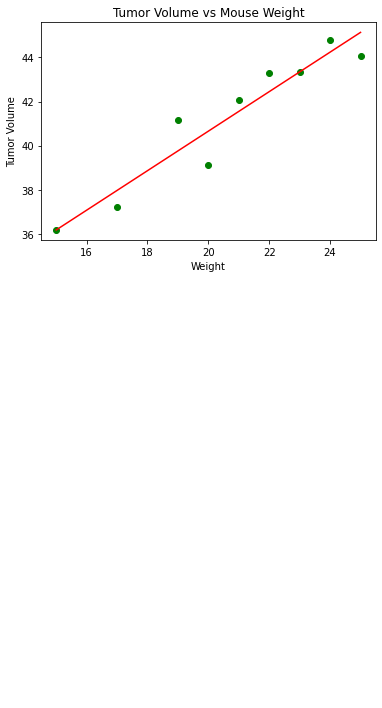

In [56]:
plt.scatter(x_values, y_values, marker = "o", facecolors="green", edgecolors="green")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume vs Mouse Weight")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()